Paletkaning massasi: 5000.0 kg


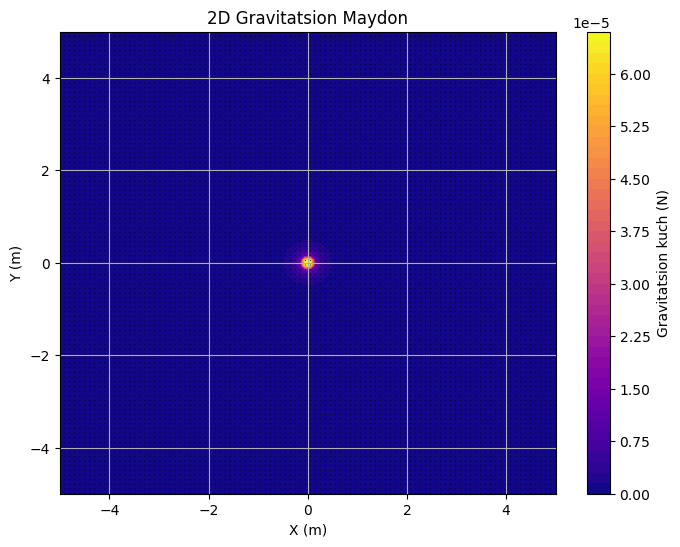

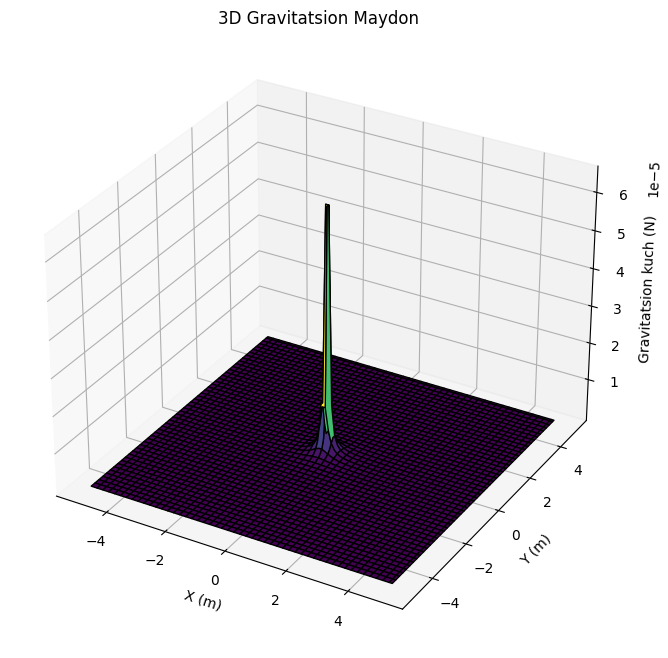

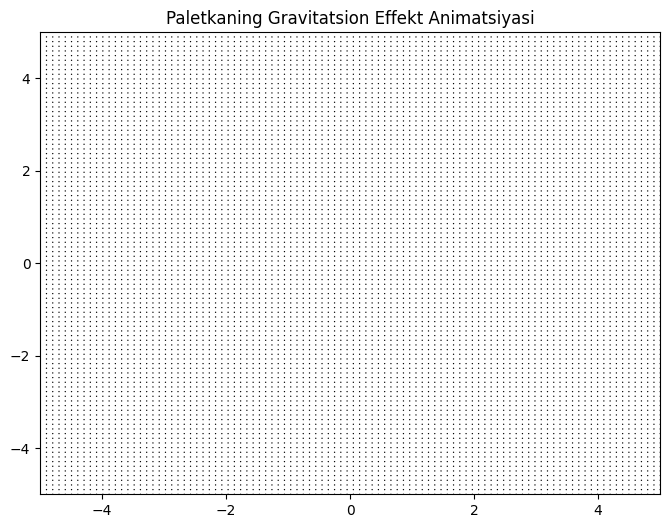

In [1]:
# Zarur kutubxonalarni import qilish
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. Paletkalarni tuzish
# Paletka parametrlari
density = 5000  # Zichlik (kg/m^3)
width = 2.0     # Paletkaning kengligi (m)
height = 1.0    # Paletkaning balandligi (m)
depth = 0.5     # Paletkaning qalinligi (m)

# Massani hisoblash
mass = density * width * height * depth  # kg
print(f"Paletkaning massasi: {mass} kg")

# Paletkaning koordinatalari
x_center, y_center = 0.0, 0.0  # Markaz koordinatalari

# 2. Gravitatsion effektni hisoblash
# Gravitatsion konstant
G = 6.67430e-11  # m^3/(kg*s^2)

# Gravitatsion maydon hisoblash funksiyasi
def gravitational_effect(x, y, x_center, y_center, mass):
    dx = x - x_center
    dy = y - y_center
    r_squared = dx**2 + dy**2
    r_squared[r_squared == 0] = 1e-12  # Nolga bo‘linishni oldini olish
    g = G * mass / r_squared
    gx = g * dx / np.sqrt(r_squared)
    gy = g * dy / np.sqrt(r_squared)
    return gx, gy, g

# Tarmoqlar (grid) yaratish
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Gravitatsion maydonni hisoblash
gx, gy, g = gravitational_effect(X, Y, x_center, y_center, mass)

# 3. 2D grafik yaratish
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, g, levels=50, cmap='plasma')
plt.colorbar(label='Gravitatsion kuch (N)')
plt.quiver(X, Y, gx, gy, color='black', scale=1e10)
plt.title('2D Gravitatsion Maydon')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid()
plt.show()

# 4. 3D grafik yaratish
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Gravitatsion kuchni 3D ko‘rsatish
ax.plot_surface(X, Y, g, cmap='viridis', edgecolor='k')
ax.set_title('3D Gravitatsion Maydon')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Gravitatsion kuch (N)')
plt.show()

# 5. Animatsiya yaratish
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_title('Paletkaning Gravitatsion Effekt Animatsiyasi')

# Animatsiya uchun paletka massasi o‘zgaradi
masses = np.linspace(1000, 10000, 50)  # Massalar (kg)
quiver = ax.quiver(X, Y, gx, gy, color='black', scale=1e10)

def update(frame):
    global gx, gy, g
    mass = masses[frame]
    gx, gy, g = gravitational_effect(X, Y, x_center, y_center, mass)
    quiver.set_UVC(gx, gy)
    ax.contourf(X, Y, g, levels=50, cmap='plasma')
    return quiver,

ani = FuncAnimation(fig, update, frames=len(masses), blit=False)
plt.show()

# 6. Hisobot: Kodni va grafiklarni JupyterLab formatida saqlang va tahlil qiling
